The state spaces of each oscillator area (memory A, buffer B) are harmonic oscillator spaces. 

The steady states are Fock states $|\psi_n\rangle$. Coherent states $|\alpha\rangle$ are eigenstates of annihilation operator $\hat a$: $\hat a|\alpha\rangle = \alpha|\alpha\rangle$. For memory, use $\hat a$. For buffer, use $\hat b$. 

The qubit states are $|\pm\rangle = N(|\alpha\rangle \pm |-\alpha\rangle)$. Then, $|0\rangle \approx |\alpha\rangle$ and $|1\rangle \approx |-\alpha\rangle$. Here, $|\alpha\rangle$ has even and $|-\alpha\rangle$ has odd Fock state components only. 

Wigner plots plot each classical phase point included in a state with its component. 

Stabilize with two-photon pumping, only two-photon so that $|\alpha\rangle$ and $|-\alpha\rangle$ do not drift into each other:

$$\hat{L_2} = \sqrt{\kappa_2} (\hat a^2 - \alpha^2)$$

How to accomplish **loss prevention**? 

* Qubit oscillator in memory a
* Lossy oscillator in buffer b

If $\kappa_b \gg g_2, \epsilon_d$, buffer b is very lossy, obtain approximately $\hat L_2$. 

Then, have an exchange of two photons in a for one photon in b, interaction Hamiltonian:

$$\hat H_i = g_2\hat a^{\dagger 2}\hat b + g_2^* \hat a^2 \hat b^\dagger$$

How to accomplish **operations**?

Resonant drive of buffer mode:
$$\hat H_d = \epsilon_d^* \hat b + \epsilon_d \hat b^\dagger$$





## Open quantum systems

Equation for Lindblad systems:

$$\frac{d\rho}{dt} = L\rho.$$

Expression for $L\rho$:

$$L\rho = -i[\hat H, \rho] + \sum_{i} D[L_i](\rho).$$

Expression for $D[L_i](\rho)$ where $L_i$ is jump operator:

$$D[L_i](\rho) = \gamma_i\left(L_i\rho L_i^\dagger - \frac{1}{2}\left(L_i^\dagger L_i\rho + \rho L_i^\dagger L_i\right)\right).$$

Here, $\gamma_i$ is scaling factor.

## Superconducting circuits

Use $Q$, $\Phi$. 

$Q$ is time integral of $I$. Rescaled to $n$ by $n = \frac{Q}{2e}$.

$\Phi$ is time integral of $V$. Rescaled to $\phi$ by $\phi = 2\pi\frac{\Phi}{\Phi_0} \quad \Phi_0 = \frac{h}{2e}$. 

To construct circuit, want to use elements to build wanted hamiltonian and loss. Each component has energy. 

Then quantize by promoting $\phi, n$ to $\hat\phi, \hat n$ with $[\hat\phi, n] = i\bar$. 

### Linear energies:

Capacitor: 

$$E = 4E_Cn^2 \quad E_C = \frac{e^2}{2C}.$$

Inductor:

$$E = E_L \frac{\phi^2}{2} \quad E_L = \frac{\Phi_0}{(2\pi)^2L}$$

### Josephson junction

Nonlinear element. Produces current between adjacent superconductors.

$$I_s(\phi) = I_c \sin(\phi)$$
$$\dot\phi = \frac{2\pi}{\Phi_0} V$$
$$E(\phi) = -E_J \cos(\phi) \quad E_J = \frac{1}{2\pi}{I_c\Phi_0}$$


## Examples

Setup

In [1]:
import dynamiqs as dq
import jax
import jax.numpy as jnp
na = 15 # discretization resolution, Hilbert space dimension
a = dq.destroy(na) # annihilaiton operator
ad = dq.create(na) # creation operator

What is vacuum state? (Wigner plot)

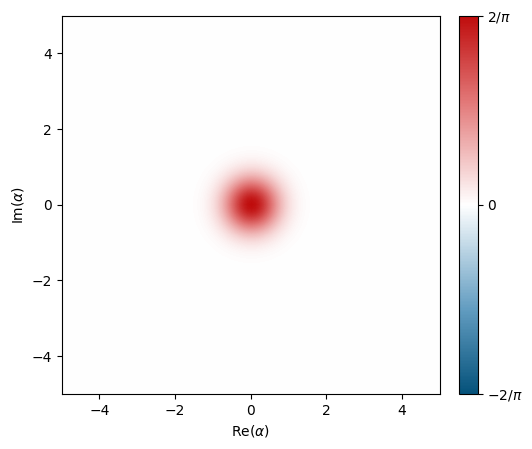

In [2]:
psi0 = dq.fock(na, 0)
dq.plot.wigner(psi0)

What is a coherent state example? (Wigner plot)

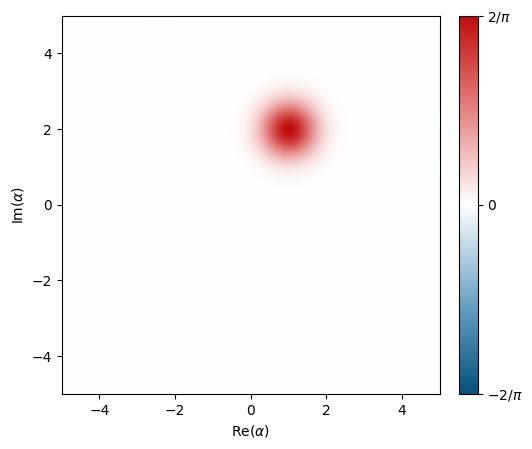

In [3]:
alpha = 1 + 2j
res = 15 # how many Fock states to include
ketalpha = dq.coherent(res, alpha)
dq.plot.wigner(ketalpha)

Look how coherent states evolve:

In [7]:
omega = 1.0  # detuning
T = jnp.pi / omega  # time of evolution

# operators
a = dq.destroy(res)  # annihilation operator
H = -omega * dq.dag(a) @ a  # Hamiltonian

# initial state and save time
psi0 = dq.coherent(res, 2.0)  # coherent state
t_save = jnp.linspace(0, T, 50)  # save times